# Data Science Exercise - Australian Housing
<div style="text-align: right"> Mannheim, 2018-12-08 </div>

*Author: luphord* 

## Overview

In this data science exercise, a dataset provided by the Australian Bureau of Statistics is downloaded and prepared for analysis. The time series of number of houses approved in New South Wales is then investigated, quantitatively modelled and a prediction is performed.

### Data Preparation
Data is downloaded from Australian Bureau of Statistics in a JSON format. It is decoded and the time series of interest is extracted.
- [Understanding Dataset Structure](1.1-Exploring-dataset-structure.ipynb)
- [Loading and Decoding Dataset](2.0-Loading-dataset.ipynb)
- [Extracting Time Series](2.1-Extracting-timeseries.ipynb)

### Data Exploration
Empirical analysis of the time series and seasonal decomposition is performed.
- [Data Exploration](3.0-Exploring-timeseries.ipynb)

### OLS Modeling
Ordinary Least Squares of functions of the time (particularly linear, quadratic and periodic) is investigated as a model class.
- [Linear Model](4.0-Linear-model.ipynb)
- [Quadratic Model](4.1-Quadractic-model.ipynb)
- [Quadratic and Cosine Model](4.2-OLS-with-periodic-regressor.ipynb)

### AR Modelling (incomplete)
Attempt at AR(IMA) modelling. Due to technical issues and the limited amount of time, this section is incomplete. It is kept only for reference. 
- [AR Model](5.1-Autoregressive-model.ipynb)
- [ARMA Model](5.2-ARMA-model.ipynb)
- [ARIMA Model](5.3-ARIMA-model.ipynb)



## Final Model Selection
Given the limited scope of this exercise and the issues with AR(IMA) modelling, the proposed model is a simple OLS model of the time. The number of houses approved in New South Wales $y(t)$ is modelled as $y(t) = \beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 cos(2\pi t)$. Details can be found in [Quadratic and Cosine Model](4.2-OLS-with-periodic-regressor.ipynb), the plot of the prediction is reproduced here:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from australian_housing import paths
from australian_housing.models.ols_model import periodic_regressor, fit_ols, history_and_prediction_plot

In [3]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])
regr = periodic_regressor(poly_order=2, add_cosine=True)
model_fit = fit_ols(ts, regr)

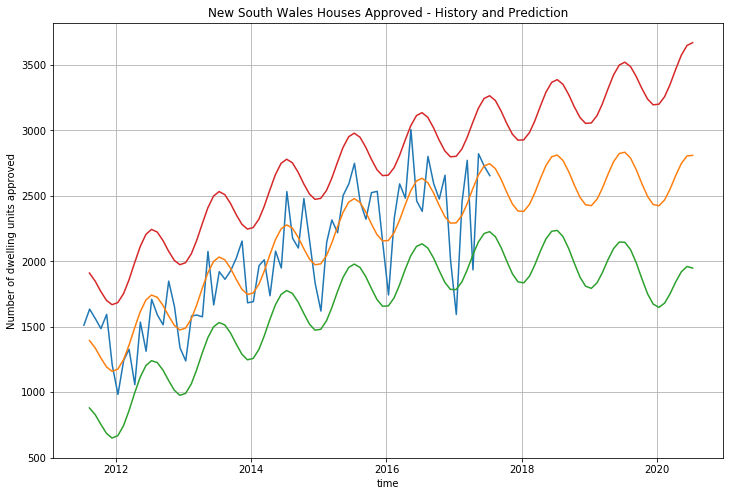

In [4]:
fig = plt.figure(figsize=(12,8))
history_and_prediction_plot(fig, ts, model_fit, regr, '2020-07-01', 'M', 0.05);